## Introdução a Data Science - Curso da Alura

Distribuições de notas de avaliação para 9737 filmes


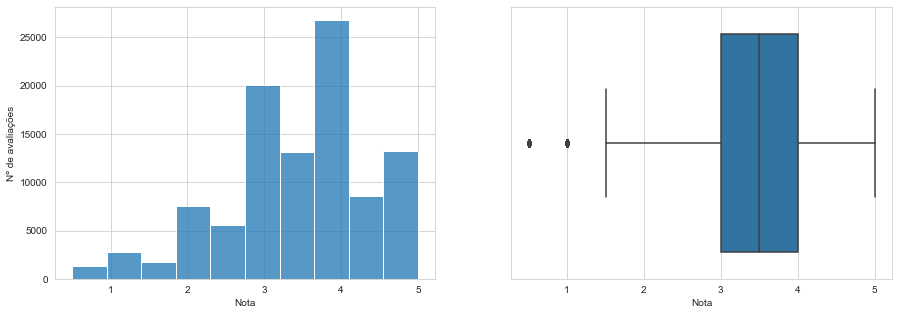

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

ratings = pd.read_csv("data/ratings.csv")
movies = pd.read_csv("data/movies.csv")

movieTitles= movies.title.unique()
numberOfMovies = len(movieTitles)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax = sns.histplot(data=ratings, x='rating', bins=10, ax=axes[0])
ax.set(xlabel="Nota", ylabel="Nº de avaliações")
sns.boxplot(x=ratings['rating'], ax=axes[1]).set_xlabel("Nota")

print(f"Distribuições de notas de avaliação para {numberOfMovies} filmes")

### Entre esses filmes, encontra-se os 3 primeiros filmes da franquia Toy Story. A presente análise será focada nessa trilogia para comparar e discutir a avaliação dos 3 filmes.

Text(0.5, 0, '')

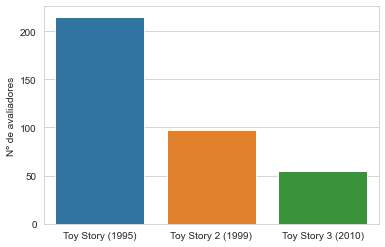

In [2]:
toyStoryRatings = []
for title in movieTitles:
  if 'Toy Story' in title:
    id = movies.query(f'title == "{title}"').movieId.unique()[0]
    series = ratings.query(f'movieId == {id}')
    series.insert(0, "title", title)
    toyStoryRatings.append(series)
  

toyStoryRatings = pd.concat(toyStoryRatings)
toyStoryRatingsGroupBy = toyStoryRatings.groupby("title").mean().rating

toyStoryWatchers = toyStoryRatings.groupby("title").userId.unique()               

for i in range(len(toyStoryWatchers)):
    toyStoryWatchers[i] = len(toyStoryWatchers[i])

toyStoryWatchers = toyStoryWatchers.to_frame().reset_index()
toyStoryWatchers.columns = ["Título", "Nº de avaliadores"]

ax = sns.barplot(x="Título", y="Nº de avaliadores", data=toyStoryWatchers, orient="v")
ax.set_xlabel("")


### Devido a diferença de quantidade de avaliadores para cada filme, uma comparação  válida pode ser feita selecionando somente os usuários que avaliaram os 3 filmes.

In [3]:
watchers = toyStoryRatings.groupby("title").userId.unique()

#Criação de conjuntos de avaliadores para cada filme
set1 = set(watchers[0])
set2 = set(watchers[1])
set3 = set(watchers[2])

'''
Interseção dos conjuntos para selecionar somente 
os avaliadores simultâneos dos 3 filmes
'''
users = list(set1.intersection(set2).intersection(set3))

toyStoryValidRatings = toyStoryRatings.query(f"userId in {users}")
toyStoryValidRatings

,title,userId,movieId,rating,timestamp
3219,Toy Story (1995),21,1,3.5,1407618878
7112,Toy Story (1995),50,1,3.0,1514238116
10360,Toy Story (1995),68,1,2.5,1158531426
21691,Toy Story (1995),141,1,4.0,1513130643
23129,Toy Story (1995),159,1,4.5,1508640172
...,...,...,...,...,...
87942,Toy Story 3 (2010),567,78499,2.0,1525288289
88949,Toy Story 3 (2010),573,78499,5.0,1299222433
92035,Toy Story 3 (2010),596,78499,3.5,1535708446
95935,Toy Story 3 (2010),601,78499,4.0,1521397837


Text(0.5, 0, 'Título')

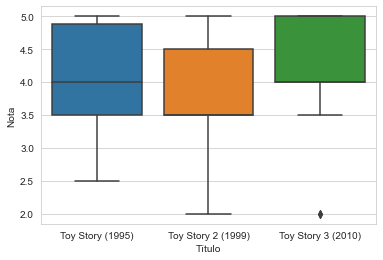

In [4]:
movie1Ratings = toyStoryValidRatings.query("title == 'Toy Story (1995)'").rating
movie2Ratings = toyStoryValidRatings.query("title == 'Toy Story 2 (1999)'").rating
movie3Ratings = toyStoryValidRatings.query("title == 'Toy Story 3 (2010)'").rating

ax = sns.boxplot(data=toyStoryValidRatings, y="rating", x="title")
ax.set_ylabel("Nota")
ax.set_xlabel("Título")

#### Apesar de mostrar diferenças na avaliação de cada filme, o boxplot não é uma boa opção nesse caso. Uma vez que o número de avaliações foi reduzido para 30, juntamente com a menor quantidade de possíveis valores de avaliações, alguns quartis equivaleram-se com outros, como pode ser observado para os boxplots do segundo e terceiro filme. Somente o primeiro filme apresentou um gráfico satisfatório, com cada quartil devidamente separado. Ainda assim, pode se observar que o primeiro e último filmes foram os mais bem avaliados, visto que suas avaliações concentram-se em valores maiores.

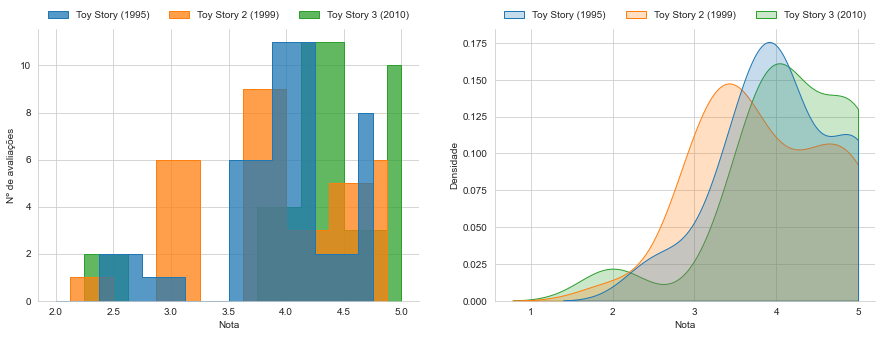

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1 = sns.histplot(toyStoryValidRatings, 
                  x="rating", 
                  hue="title", 
                  multiple="dodge", 
                  element="step",
                  ax=axes[0])

ax2 = sns.kdeplot(data=toyStoryValidRatings, 
                  x="rating", 
                  hue="title",
                  clip=(0,5),
                  fill=True,
                  ax=axes[1])

for ax in axes:
    ax.set_ylabel("Nº de avaliações")
    ax.set_xlabel("Nota")
    sns.move_legend(ax, "lower center",
                bbox_to_anchor=(.5, 1), 
                ncol=3, 
                title=None, 
                frameon=False)

ax2.set_ylabel("Densidade")
sns.despine()

### Pode-se concluir que o filme mais bem-avaliado da franquia Toy Story foi o Toy Story 3, lançado em 2010. Tanto pelo histograma quanto pela estimativa de densidade kernel, para 30 avaliações de usuários que assistiram aos 3 filmes, a distribuição obtida indica uma maior probabilidade de avaliações 4 - 5 para essa sequência da franquia, seguido pelo primeiro filme, lançado em 1995. Por último, encontra-se o segundo filme da franquia, lançado em 1999. 
##### Sabe-se que, em geral, o lançamento de uma continuação de um filme de sucesso costuma ser uma tarefa arriscada e com menos sucesso que o filme anterior, o que pode ser constatado pela comparação das distribuições do primeiro e segundo filmes da franquia. Poderia-se atribuir o grande sucesso do último filme a nostalgia de grande parte dos espectadores (eu incluso) sobre a franquia, em especial o primeiro filme, que fez parte da infância de muitos jovens adultos no momento em que o terceiro filme foi lançado. Crianças de 5 a 10 anos que assistiram o primeiro filme, seja no cinema ou alguns anos após o lançamento, teriam, por exemplo, entre 16 e 25 anos de idade e, considerando o tema do filme, no qual o Andy vai pra faculdade e precisar abandonar os brinquedos, pode-se argumentar que o público-alvo real do filme encontra-se nessa faixa etária, assim como acontece com outros filmes da Pixar (e.g. Os Incríveis).



### Ambiente de desenvolvimento:

In [6]:
import os

stream = os.popen("pip list")
output = stream.readlines()

for line in output:
    print(line.strip())

Package              Version
-------------------- -----------
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.1
certifi              2021.10.8
cffi                 1.15.1
charset-normalizer   2.0.12
colorama             0.4.5
cycler               0.11.0
debugpy              1.6.2
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.8.3
fastjsonschema       2.16.1
fonttools            4.34.4
idna                 3.3
ipykernel            6.15.1
ipython              8.4.0
ipython-genutils     0.2.0
ipywidgets           7.7.1
jedi                 0.18.1
Jinja2               3.1.2
jsonschema           4.7.2
jupyter              1.0.0
jupyter-client       7.3.4
jupyter-console      6.4.4
jupyter-core         4.11.1
jupyterlab-pygments  0.2.2
jupyterlab-widgets   1.1.1
kiwisolver           1.4.4
MarkupSa